==============================================================================

# Task 5: Decision Trees & Random Forests

==============================================================================

## Step 1: Install Required Libraries

In [1]:
!pip install graphviz seaborn

## Step 2: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import graphviz
from google.colab import files

## Step 3: Upload Dataset

In [3]:
uploaded = files.upload()
df = pd.read_csv("heart.csv")

Saving heart.csv to heart.csv


## Step 4: Dataset Overview

In [4]:
print("Dataset Shape:", df.shape)
display(df.head())  # Preview first few rows

Dataset Shape: (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Step 5: Check Missing Values

In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Step 6: Feature & Target Split

In [6]:
X = df.drop("target", axis=1)  # Features
y = df["target"]              # Target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Step 7: Decision Tree Classifier

In [8]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred_dt = dt.predict(X_test)

In [10]:
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Step 8: Visualizing Decision Tree

In [22]:
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = graphviz.Source(dot_data)

# Save PNG directly
graph.render("decision_tree", format="png", cleanup=True)

print("Decision Tree saved as decision_tree.png")

Decision Tree saved as decision_tree.png


## Step 9: Controlling Overfitting (max_depth=4)

In [12]:
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
y_pred_limited = dt_limited.predict(X_test)

In [13]:
print("\nDecision Tree (max_depth=4) Accuracy:", accuracy_score(y_test, y_pred_limited))


Decision Tree (max_depth=4) Accuracy: 0.8


## Step 10: Random Forest Classifier

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred_rf = rf.predict(X_test)

In [16]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Step 11: Feature Importance

In [17]:
importances = rf.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_df = feat_df.sort_values("Importance", ascending=False)

/tmp/ipython-input-2915285521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")


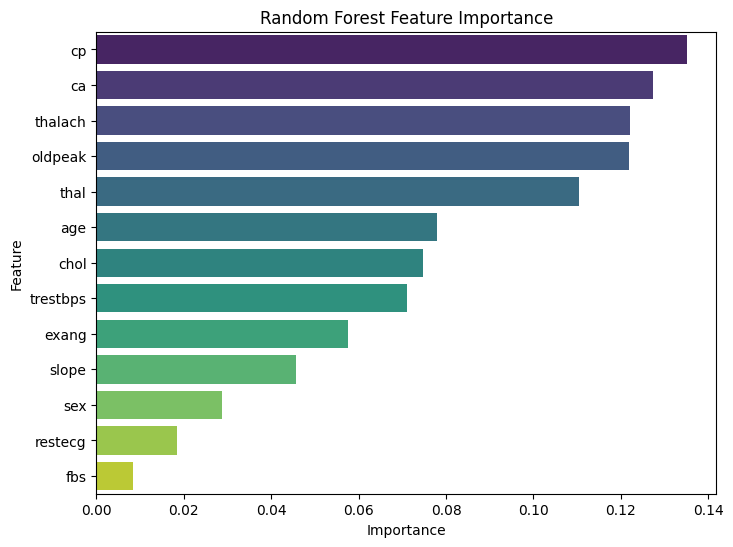

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis")
plt.title("Random Forest Feature Importance")
plt.show()

## Step 12: Cross-Validation

In [19]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nRandom Forest CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Random Forest CV Accuracy: 99.71%
